In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [12]:
# Load the CSV file into a DataFrame
crypto_data = pd.read_csv('C:\\Users\\kzam3\\Downloads\\M11_Starter_Code\\Starter_Code\\Resources\\crypto_data.csv')

# Set the 'coin_id' column as the index of the DataFrame
crypto_data = crypto_data.set_index('coin_id')

In [13]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
# Replace 'crypto_data' with the name of your DataFrame containing the cryptocurrency data
normalized_data = scaler.fit_transform(crypto_data)

# Convert the normalized data back to a DataFrame (optional, for better visualization and further processing)
normalized_df = pd.DataFrame(normalized_data, columns=crypto_data.columns)

In [14]:
# Create a DataFrame with the scaled data, ensuring the index aligns with the original DataFrame
scaled_crypto_data = pd.DataFrame(normalized_data, columns=crypto_data.columns, index=crypto_data.index)

# Since the coin_id is already the index, we don't need to copy it separately or reset the index

# Display sample data to verify the scaling and indexing
print(scaled_crypto_data.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

### Find the Best Value for k Using the Original Scaled DataFrame.

In [16]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values  = list(range(1,12))

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    model = KMeans(n_clusters=k, random_state=42)
    # 2. Fit the model to the data using the scaled DataFrame
    model.fit(scaled_crypto_data)
    # 3. Append the model.inertia_ to the inertia list
    inertia_values.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
print(elbow_df)

c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

     k     inertia
0    1  287.000000
1    2  195.820218
2    3  123.190482
3    4   79.022435
4    5   65.302379
5    6   54.739922
6    7   43.481606
7    8   37.517032
8    9   32.591891
9   10   28.222899
10  11   24.116198


In [18]:
import matplotlib.pyplot as plt


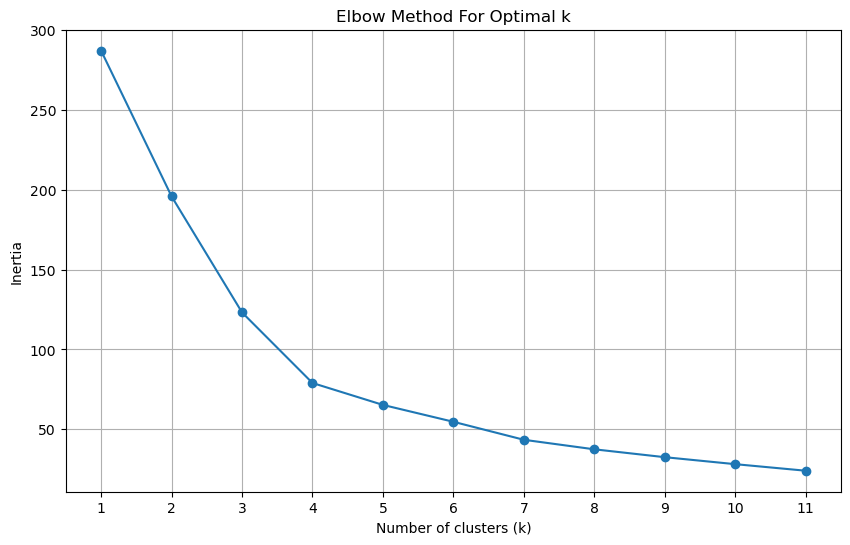

In [19]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure x-ticks are for every k-value
plt.grid(True)
plt.show()

In [20]:
import numpy as np

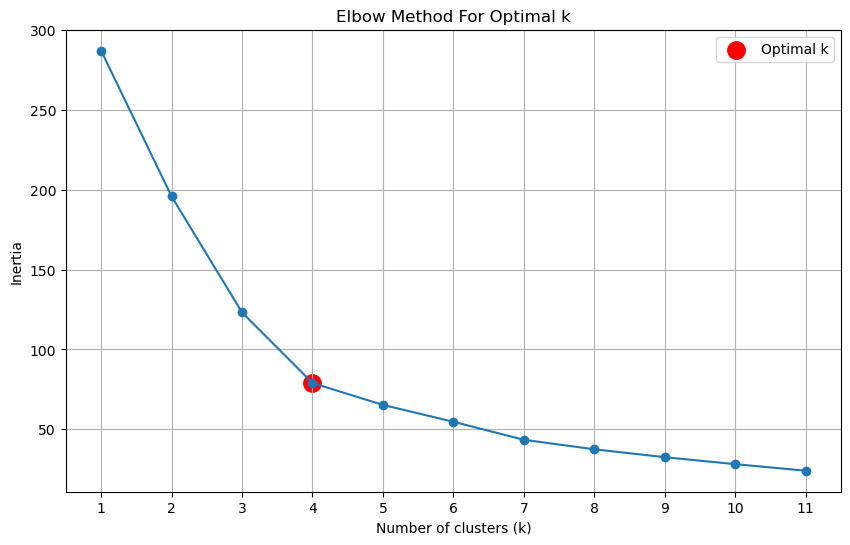

The best value for k is 4


In [21]:
# Find the optimal k value (elbow point)
diff = np.diff(elbow_df['inertia'])
diff_r = diff[1:] / diff[:-1]
optimal_k = elbow_df['k'][np.argmin(diff_r) + 1]  # Adding 1 to index to align with original inertia values

# Plot the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-')
plt.scatter(optimal_k, elbow_df.loc[elbow_df['k'] == optimal_k, 'inertia'], color='red', s=157, label='Optimal k')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)  # Ensure x-ticks are for every k-value
plt.grid(True)
plt.legend()
plt.show()

print("The best value for k is", optimal_k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for **k = 4**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [24]:
# Define the optimal number of clusters (replace 5 with your determined optimal number)
k_optimal = 4
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=k_optimal, random_state=42)

In [25]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_crypto_data)


c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [26]:
# Predict the clusters to group the cryptocurrencies using the scaled data
cluster_labels = kmeans_model.predict(scaled_crypto_data)


# View the resulting array of cluster values.
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [27]:
# Create a copy of the DataFrame
crypto_data_with_clusters = scaled_crypto_data.copy()
# Display the first few rows of the new DataFrame to verify the copy
print(crypto_data_with_clusters.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

In [34]:
# Add a new column to the DataFrame with the predicted clusters
scaled_crypto_data['cluster'] = cluster_labels


# Display sample data
print(scaled_crypto_data.head())



              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

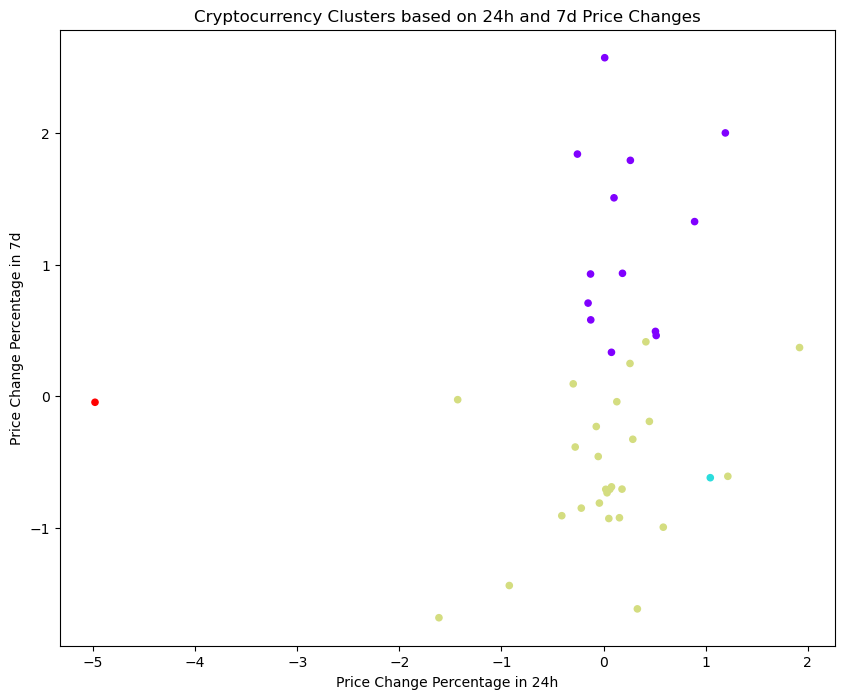

In [35]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
ax = scaled_crypto_data.plot(kind='scatter', 
                                    x='price_change_percentage_24h', 
                                    y='price_change_percentage_7d', 
                                    c='cluster', 
                                    colormap='rainbow', 
                                    colorbar=False, 
                                    figsize=(10, 8))

ax.set_title('Cryptocurrency Clusters based on 24h and 7d Price Changes')
ax.set_xlabel('Price Change Percentage in 24h')
ax.set_ylabel('Price Change Percentage in 7d')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [36]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [37]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_crypto_data)
pca_df = pd.DataFrame(
    data=pca_data, 
    columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3']
)


# View the first five rows of the DataFrame. 
pca_df.head()

,Principal Component 1,Principal Component 2,Principal Component 3
0,-1.585139,0.134394,0.545621
1,-1.322581,0.054494,1.115709
2,0.266335,-0.536409,-0.796946
3,0.257225,-0.592013,-0.646529
4,-2.952250,0.422372,1.267894


In [38]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
# Display the explained variance
print("Explained Variance for Each Principal Component:", explained_variance)
#Add all values in explained variance
total_explained_variance = sum(explained_variance)
total_explained_variance = float(total_explained_variance)
print("The Total explained variance of the three principal components is", total_explained_variance)

Explained Variance for Each Principal Component: [0.37005408 0.32322221 0.19115222]
The Total explained variance of the three principal components is 0.8844285111826466


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** **0.8844285111826466**

In [39]:
# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_data, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Assuming your original data has a 'coin_id' index, copy it to the new PCA DataFrame
pca_df['coin_id'] = scaled_crypto_data.index

# Set 'coin_id' as the index of the new DataFrame
pca_df = pca_df.set_index('coin_id')

# Display the resulting PCA DataFrame
print(pca_df.head())


              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                   -1.585139               0.134394   
ethereum                  -1.322581               0.054494   
tether                     0.266335              -0.536409   
ripple                     0.257225              -0.592013   
bitcoin-cash              -2.952250               0.422372   

              Principal Component 3  
coin_id                              
bitcoin                    0.545621  
ethereum                   1.115709  
tether                    -0.796946  
ripple                    -0.646529  
bitcoin-cash               1.267894  


### Find the Best Value for k Using the PCA Data

In [40]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)


# Create an empty list to store the inertia values
inertia_values = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
for k in k_values:

# 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k)

# 2. Fit the model to the data using PCA DataFrame.
    pca = PCA(n_components=2)  
    pca_crypto_data = pca.fit_transform(crypto_data)
    kmeans.fit(pca_data)
# 3. Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)


# Display the DataFrame
print(elbow_df)

c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

    k     inertia
0   1  287.007838
1   2  196.268358
2   3  111.972027
3   4   43.205879
4   5   32.330891
5   6   24.353120
6   7   18.712312
7   8   15.144404
8   9   12.211615
9  10    9.405630


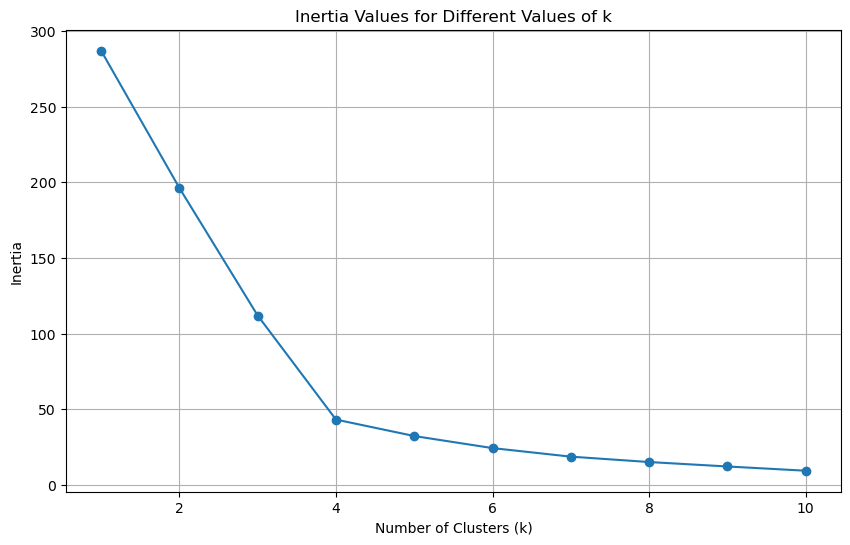

In [41]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Inertia Values for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

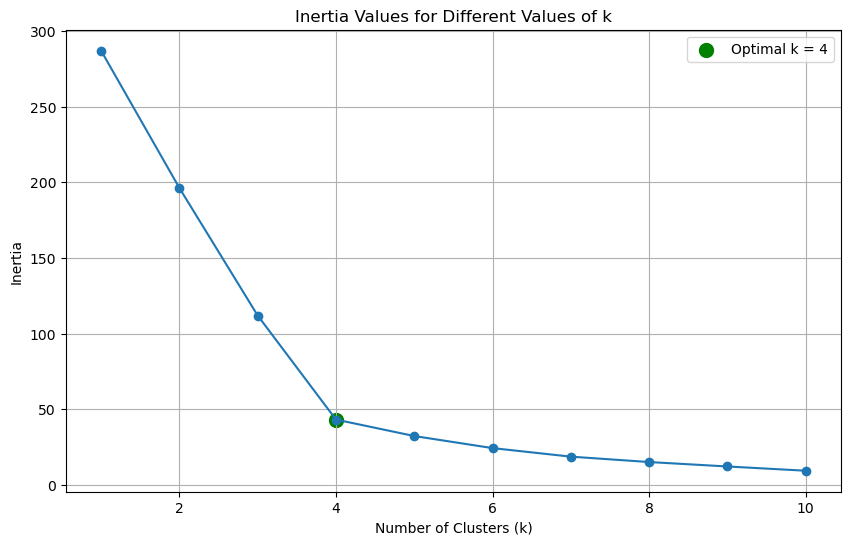

The best value for K when using the PCA data is 4 .


In [42]:
# Find the optimal k value (e.g., where the inertia change is most significant)
optimal_k_index = np.argmin(diff_r) + 1  # Adding 1 to align with original inertia values
optimal_k = k_values[optimal_k_index]
# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_values, marker='o', linestyle='-')
plt.title('Inertia Values for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

# Highlight the optimal k value with a green marker
plt.scatter(optimal_k, inertia_values[optimal_k - 1], color='green', s=100, label=f'Optimal k = {optimal_k}')
plt.legend()

plt.show()

print("The best value for K when using the PCA data is", optimal_k,".")

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for **k = 4**


* **Question:** Does it differ from the best k value found using the original data? 

  * **Answer:** It does **NOT** differ from the best k value found using the original data.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [48]:
# Initialize the K-Means model using the best value for k
kmeans_model = KMeans(n_clusters=optimal_k)


In [49]:
# Fit the K-Means model using the PCA data
kmeans_model.fit(crypto_data)


c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4)

In [53]:
# Apply PCA to the original data
pca = PCA(n_components=7)
pca_data = pca.fit_transform(crypto_data)

In [54]:
# Predict the clusters to group the cryptocurrencies using the PCA data
cluster_labels = kmeans_model.predict(pca_data)

# Print the resulting array of cluster values.
print(cluster_labels)


c:\Users\kzam3\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [56]:

# Create a copy of the DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=[f'Principal Component {i+1}' for i in range(7)], index=crypto_data.index)

# Add a new column to the DataFrame with the predicted clusters
pca_df['Cluster'] = cluster_labels

# Display sample data
print(pca_df.head())

              Principal Component 1  Principal Component 2  \
coin_id                                                      
bitcoin                 -341.800963             -51.366775   
ethereum                -249.420466              24.117548   
tether                  -402.614721            -118.710737   
ripple                  -406.752437             -79.487286   
bitcoin-cash            -382.429948            -103.431959   

              Principal Component 3  Principal Component 4  \
coin_id                                                      
bitcoin                   12.525471              -8.642674   
ethereum                 -14.231466              -5.204025   
tether                    24.838397               1.831882   
ripple                     1.566331              -5.563183   
bitcoin-cash              16.753073             -24.303473   

              Principal Component 5  Principal Component 6  \
coin_id                                                      
bitcoi

In [57]:
# Import hvplot for Pandas
import hvplot.pandas  


In [60]:
# Convert the PCA data to a DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7'])

# Add the cluster labels to the DataFrame
pca_df['Cluster'] = cluster_labels

# Now create the scatter plot
plot = pca_df.hvplot.scatter(x='PCA1', y='PCA2', by='Cluster', colormap='viridis', width=600, height=400)

# Display the plot
plot

:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2)

### Determine the Weights of Each Feature on each Principal Component

In [61]:
# Use the columns from the original scaled DataFrame as the index.
# Ensure pca_df has the same index as the scaled_crypto_data
pca_df.index = scaled_crypto_data.index

In [63]:
# Assuming `pca` is your PCA object and `scaled_crypto_data` is the scaled data used for PCA
# Extracting the PCA loadings
loadings = pca.components_

# Converting the loadings into a DataFrame for easier interpretation
loadings_df = pd.DataFrame(loadings, 
                           columns=[f'Feature_{i+1}' for i in range(loadings.shape[1])], 
                           index=[f'PC{i+1}' for i in range(loadings.shape[0])])
# Displaying the loading scores for each principal component
print(loadings_df)

     Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
PC1  -0.001521  -0.000197  -0.000705   0.000955   0.008795   0.300266   
PC2   0.003933  -0.001289   0.006577   0.087961   0.158367   0.937599   
PC3   0.013938  -0.016462   0.126844   0.377659   0.899181  -0.173684   
PC4  -0.012728  -0.154239  -0.316027  -0.846178   0.399967   0.011727   
PC5   0.040326   0.770150   0.549732  -0.312934   0.070131   0.013313   
PC6   0.242605   0.591378  -0.746221   0.182314   0.032415  -0.016110   
PC7  -0.969094   0.181878  -0.157932   0.049520   0.019341  -0.002798   

     Feature_7  
PC1   0.953813  
PC2  -0.296700  
PC3   0.046120  
PC4  -0.006818  
PC5  -0.003895  
PC6   0.004547  
PC7  -0.000972  


In [64]:
#strongest 
strongest_features = loadings_df.apply(lambda x: x.abs().idxmax(), axis=1)
print(strongest_features)


PC1    Feature_7
PC2    Feature_6
PC3    Feature_5
PC4    Feature_4
PC5    Feature_2
PC6    Feature_3
PC7    Feature_1
dtype: object


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** PC1 is most influenced by Feature_7; PC2 is most influenced by Feature_6; PC3 is most influenced by Feature_5; PC4 is most influenced by Feature_4; PC5 is most influenced by Feature_2; PC6 is most influenced by Feature_3; PC7 is most influenced by Feature_1;
    